# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Описание данных
Данные геологоразведки трёх регионов находятся в файлах: 

    /datasets/geo_data_0.csv. 
    /datasets/geo_data_1.csv. 
    /datasets/geo_data_2.csv. 
    id — уникальный идентификатор скважины;
    f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
    product — объём запасов в скважине (тыс. баррелей).

Нам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны.  
Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

Условия задачи:  
- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые);
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки;
- Бюджет на разработку скважин в регионе — 10 млрд рублей;
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей;
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

Цели:  
1) построить модель для определения региона, где добыча принесёт наибольшую прибыль;  
2) Проанализируйте возможную прибыль и риски техникой Bootstrap.

Инструкция по выполнению проекта:

    Загрузить и подготовить данные. Поясните порядок действий.
    Обучить и проверить модель для каждого региона:
     1.1. Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.
     1.2. Обучите модель и сделайте предсказания на валидационной выборке.
     1.3. Сохраните предсказания и правильные ответы на валидационной выборке.
     1.4. Напечатайте на экране средний запас предсказанного сырья и RMSE модели.
     1.5. Проанализируйте результаты.
    Подготовьтесь к расчёту прибыли:
     2.1. Все ключевые значения для расчётов сохраните в отдельных переменных.
     2.2. Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе. 
     2.3. Напишите выводы по этапу подготовки расчёта прибыли.
    Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
     3.1. Выберите скважины с максимальными значениями предсказаний. 
     3.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
     3.3. Рассчитайте прибыль для полученного объёма сырья.
    Посчитайте риски и прибыль для каждого региона:
     4.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
     4.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
     4.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.


## Загрузка и подготовка данных

### Импорт библиотек, оценка данных

Начинаем всегда с загрузки нужных библиотек, после чего сохраним наши данные в переменные.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты  на месте
</div>

In [2]:
pth0_1 = '/datasets/geo_data_0.csv'
pth0_2 = 'C:/Users/username/Desktop/geo_data_0.csv'

pth1_1 = '/datasets/geo_data_1.csv'
pth1_2 = 'C:/Users/username/Desktop/geo_data_1.csv'

pth2_1 = '/datasets/geo_data_2.csv'
pth2_2 = 'C:/Users/username/Desktop/geo_data_2.csv'

if os.path.exists(pth0_1):
    data_1 = pd.read_csv(pth0_1)
elif os.path.exists(pth0_2):
    data_1 = pd.read_csv(pth0_2)
else:
    print('Check the PATH to data_0 file please')

if os.path.exists(pth1_1):
    data_2 = pd.read_csv(pth1_1)
elif os.path.exists(pth1_2):
    data_2 = pd.read_csv(pth1_2)
else:
    print('Check the PATH to data_1 file please')
    
if os.path.exists(pth2_1):
    data_3 = pd.read_csv(pth2_1)
elif os.path.exists(pth2_2):
    data_3 = pd.read_csv(pth2_2)
else:
    print('Check the PATH to data_2 file please')
    

Смотрим, какие значения содержатся, выводим первую аналитическую информацию

In [3]:
display(data_1.head())
display(data_1.describe())
display(data_1.info())


display(data_2.head())
display(data_2.describe())
display(data_2.info())

display(data_3.head())
display(data_3.describe())
display(data_3.info())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

В целом, данные выглядят чистыми, осталось только оценить наличие дубликатов.

In [4]:
print('Кол-во дубликатов в наборах данных: первый:', data_1.duplicated().sum(), \
          'второй:', data_2.duplicated().sum(), \
          'третий:', data_3.duplicated().sum())

Кол-во дубликатов в наборах данных: первый: 0 второй: 0 третий: 0


### Обработка оригинальных данных

Пропусков и дубликатов в данных нет, столбец `id` в каждом из наборов не несёт информационной нагрузки для обучения модели, его нужно удалить.

In [5]:
data_1 = data_1.drop(['id'], axis=1)
data_2 = data_2.drop(['id'], axis=1)
data_3 = data_3.drop(['id'], axis=1)

Так как одним из основных параметров является объём запасов нефти в скважине, то хорошо бы визуализировать распределение данного показателя для каждого набора данных.

In [6]:
# функция для построения гистограммы по указанному столбцу
# принимает столбец, кол-во корзин и ограничения осей
def hist(seria, bins, xlim_max, ylim_max):
    plt.figure(figsize=[12,9])

    plt.hist(seria, bins=bins)

    plt.xlim([0,xlim_max])
    plt.ylim([0,ylim_max])

    plt.xlabel("Объем нефти на скважину, тыс. барелей")
    plt.ylabel("Количество скважин")

    plt.title("Гистограмма распределения по объему скважин")
    plt.show()

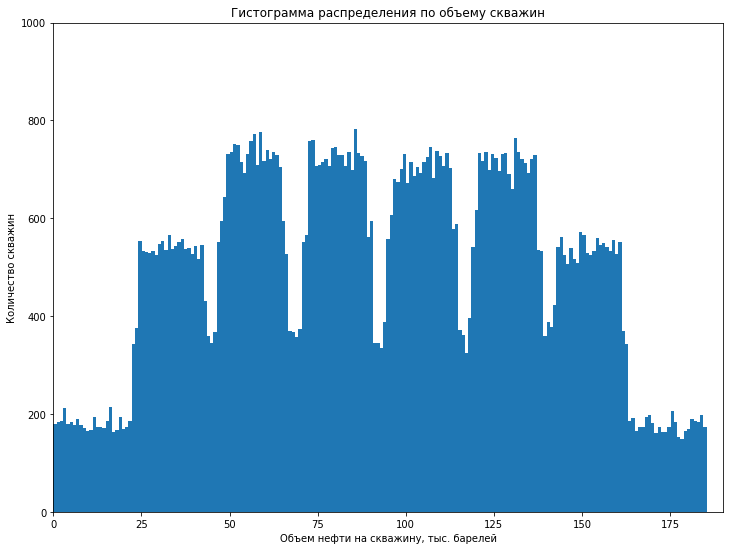

In [7]:
hist(data_1['product'], 200, 190, 1000)

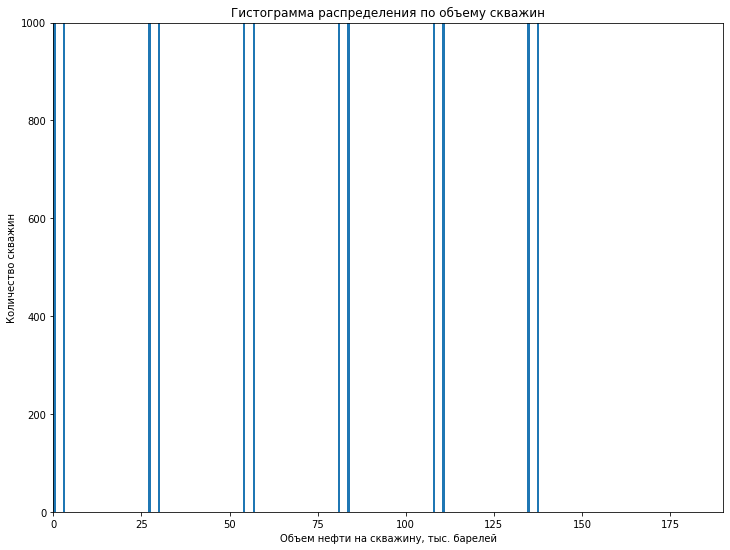

In [8]:
hist(data_2['product'], 200, 190, 1000)

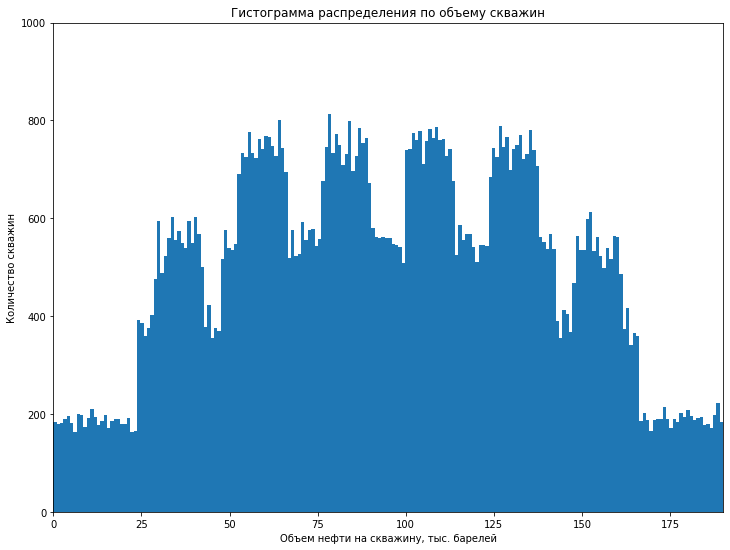

In [9]:
hist(data_3['product'], 200, 190, 1000)

Вот это поворот! В втором наборе для интересующего нас показателя имеются неполные данные в большом количестве.  
Необходимо точно понимать кол-во имеющихся данных и постараться понять причину сложившейся ситуации.

Согласно графику и инф-и, полученной из первичных аналитических сведений, колонка `product` заполнена непустыми значениями, скорее всего это нули. Давайте проверим эту теорию и посчитаем кол-во нулей.

In [10]:
# функция подсчёта нулей в значениях указанного столбца
def zeros_count(df, column):
    zeros = df[df[column] == 0][column].count()
    percent = zeros / df.shape[0]
    print('Количество нулевых значений:', zeros)
    print('Процент нулевых значений от общего числа строк:', percent)

In [11]:
zeros_count(data_1, 'product')

Количество нулевых значений: 1
Процент нулевых значений от общего числа строк: 1e-05


In [12]:
zeros_count(data_2, 'product')

Количество нулевых значений: 8235
Процент нулевых значений от общего числа строк: 0.08235


In [13]:
zeros_count(data_3, 'product')

Количество нулевых значений: 1
Процент нулевых значений от общего числа строк: 1e-05


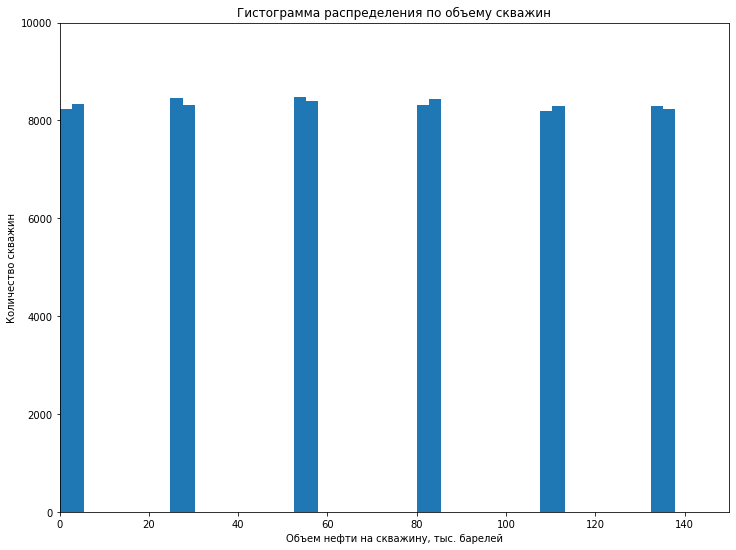

In [14]:
# поиграем немного с масштабом гистограммы, путём изменения параметров 
hist(data_2['product'], 50, 150, 10000)

### Выводы:  
Проанализировав имеющиеся данные, стало понятно, что `f0, f1, f2` - пространство признаков будущей модели, `product` - целевой признак.  

Во втором наборе данных около 8.2% значений целевого признака равно 0. При этом, сравнивая распределение признаков по наборам данных, заметно, что у первого и третьего наборов имеются признаки нормального распределения. В свою очередь у второго набора распределение выглядит искусственным. В связи с чем причиной нулевых значений могут быть неисследованность или намеренная фальсификация.  

**Данные готовы к обучению**

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные осмотрены, но можно было бы еще как минимум изучить корреляции, так как мы планируем использовать линейные модели, а для них это важно. 
</div>


<div class="alert alert-block alert-info">
<b>Совет:</b>  Советую обратить внимание на библиотеки sweetviz и pandas_profiling помогут в проведении более тщательного EDA анализа. Исследовательский анализ можно делать и с помощью ручного вызова функций дефолтных библиотек. Данные библиотеки хороши для максимизации комфорта презентации результатов анализа бизнес-пользователям.  

Очень просты в использоовании, на вход кладется датафрейм: pandas_profiling.ProfileReport(df) 
</div>


<div class="alert alert-block alert-warning">
<b>Спасибо за совет, почитаю инфорамцию об указанных библиотеках</b>
</div>

## Обучение и проверка модели

### Формирование и подготовка выборок

In [15]:
# функция разбивки датафрейма на выборки
def data_split(df, target):
    features = df.drop([target] , axis=1)
    target = df[target]

    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345)
    
    return features_train, features_valid, target_train, target_valid

In [16]:
# функция для разбивки фрейма на масштабированные выборки
def data_split_scale(df, numeric, target):
    df_copy = df.copy()
    
    # сразу делим на обучающую и валидационную выборки
    train, valid = train_test_split(df_copy, test_size=0.25, random_state=12345)
    
    # обучаем скалер
    scaler = StandardScaler()
    scaler.fit(train[numeric])
    
    # масштабируем выборки
    train[numeric] = scaler.transform(train[numeric])
    valid[numeric] = scaler.transform(valid[numeric])
    
    # формируем пространство признаков и целевой признак
    features_train_s = train.drop([target], axis=1)
    target_train_s = train[target]
    features_valid_s = valid.drop([target], axis=1)
    target_valid_s = valid[target]

    return features_train_s, features_valid_s, target_train_s, target_valid_s

<div class="alert alert-block alert-success">
<b>Успех:</b> Масштабирование проведено корректно
</div


### Проверкаа необходимости масштабирования оригинальных данных

In [17]:
# сохраняем модель в переменную
model = LinearRegression()

In [18]:
# обучение модели на неизмененных данных и выведем среднеквадратичную ошибку
features_train_1, features_valid_1, target_train_1, target_valid_1 = data_split(data_1, 'product')

model.fit(features_train_1, target_train_1)
predicted_target_1 = model.predict(features_valid_1)
print('data 1 RMSE -', mean_squared_error(target_valid_1, predicted_target_1) ** 0.5)

data 1 RMSE - 37.5794217150813


In [19]:
# обучение модели на маштабированных данных и выведем среднеквадратичную ошибку
numeric = ['f0', 'f1', 'f2']
features_train_1s, features_valid_1s, target_train_1s, target_valid_1s = data_split_scale(data_1, numeric, 'product')

model.fit(features_train_1s, target_train_1s)

predicted_target_1s = model.predict(features_valid_1s)
print('data 1 RMSE scaled -', mean_squared_error(target_valid_1s, predicted_target_1s) ** 0.5)

data 1 RMSE scaled - 37.5794217150813


Как видно по результатам расчёта RMSE, масштабирование данных никак не повлияло на результат. Можно предположить, что аналогичный результат будет и для двух других выборок. Проверим

In [20]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = data_split(data_2, 'product')

model.fit(features_train_2, target_train_2)
predicted_target_2 = model.predict(features_valid_2)
print('data 2 RMSE -', mean_squared_error(target_valid_2, predicted_target_2) ** 0.5)

data 2 RMSE - 0.893099286775617


In [21]:
numeric = ['f0', 'f1', 'f2']
features_train_2s, features_valid_2s, target_train_2s, target_valid_2s = data_split_scale(data_2, numeric, 'product')

model.fit(features_train_2s, target_train_2s)

predicted_target_2s = model.predict(features_valid_2s)
print('data 2 RMSE scaled -', mean_squared_error(target_valid_2s, predicted_target_2s) ** 0.5)

data 2 RMSE scaled - 0.893099286775617


In [22]:
features_train_3, features_valid_3, target_train_3, target_valid_3 = data_split(data_3, 'product')

model.fit(features_train_3, target_train_3)
predicted_target_3 = model.predict(features_valid_3)
print('data 3 RMSE -', mean_squared_error(target_valid_3, predicted_target_3) ** 0.5)

data 3 RMSE - 40.02970873393434


In [23]:
numeric = ['f0', 'f1', 'f2']
features_train_3s, features_valid_3s, target_train_3s, target_valid_3s = data_split_scale(data_3, numeric, 'product')

model.fit(features_train_3s, target_train_3s)

predicted_target_3s = model.predict(features_valid_3s)
print('data 3 RMSE scaled -', mean_squared_error(target_valid_3s, predicted_target_3s) ** 0.5)

data 3 RMSE scaled - 40.02970873393434


Результат расчётов подтвердил наше предположение - масштабирование оригинальных данных не требуется.  

<div class="alert alert-block alert-success">
<b>Успех:</b> Согласен
</div


### Улучшение показателей предсказания модели за счёт подбора гиперпараметров

Можно попробовать улучшить показтели работы модели за счёт изменения её гиперпараметров.

In [24]:
# так как линейная регрессия - достаточно простая модель, то обладает небольшим кол-ом гиперпараметров
# default normalize=False
model = LinearRegression(normalize=True)
model.fit(features_train_1, target_train_1)
predicted_target_1 = model.predict(features_valid_1)
print('data 1 LR_norm RMSE -', mean_squared_error(target_valid_1, predicted_target_1) ** 0.5)

# default fit_intercept = True
model = LinearRegression(fit_intercept=False)
model.fit(features_train_1, target_train_1)
predicted_target_1 = model.predict(features_valid_1)
print('data 1 LR_interc RMSE -', mean_squared_error(target_valid_1, predicted_target_1) ** 0.5)

data 1 LR_norm RMSE - 37.5794217150813
data 1 LR_interc RMSE - 60.4397122136312


Как видно по результатам, изменение гиперпараметров если и оказывает влияние на качество работы модели, то отрицательное.

### Предсказание запасов сырья

Для будущих расчётов прибыли и рисков необходимо оценить имеющиеся запасы по каждой скважине и суммарный запас в регионе 

In [25]:
# функция расчёта предсказанного запаса, сравнения с реальным и расчёта RMSE
model = LinearRegression()

def predict_stock(df, target_name):
    features = df.drop([target_name] , axis=1)
    target = df[target_name]
    
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345)
    
    model.fit(features_train, target_train)
    target_predicted = model.predict(features_valid)
    
    # формируем словарь, чтобы позже сформировать новый набор данных из рассчитанных значений
    data = {'real_product' : target_valid,
            'predicted_product' : target_predicted         
    }
    
    data_frame = pd.DataFrame(data, columns = ['real_product', 'predicted_product'])
    rmse = mean_squared_error(target_valid, target_predicted) ** 0.5
    oil_mean = data_frame['predicted_product'].mean()
    oil_sum = data_frame['predicted_product'].sum()
    
    return data_frame, rmse, oil_mean, oil_sum

In [26]:
data_1_predicted, data_1_rmse, data_1_predicted_mean, data_1_predicted_sum = predict_stock(data_1, 'product')
print('data 1')
print(data_1_predicted.head())
print('RMSE -', data_1_rmse)
print('Средний запас сырья -', data_1_predicted_mean)

data 1
       real_product  predicted_product
71751     10.038645          95.894952
80493    114.551489          77.572583
2655     132.603635          77.892640
53233    169.072125          90.175134
91141    122.325180          70.510088
RMSE - 37.5794217150813
Средний запас сырья - 92.59256778438035


In [27]:
data_2_predicted, data_2_rmse, data_2_predicted_mean, data_2_predicted_sum = predict_stock(data_2, 'product')
print('data 2')
print(data_2_predicted.head())
print('RMSE -', data_2_rmse)
print('Средний запас сырья -', data_2_predicted_mean)

data 2
       real_product  predicted_product
71751     80.859783          82.663314
80493     53.906522          54.431786
2655      30.132364          29.748760
53233     53.906522          53.552133
91141      0.000000           1.243856
RMSE - 0.893099286775617
Средний запас сырья - 68.728546895446


In [28]:
data_3_predicted, data_3_rmse, data_3_predicted_mean, data_3_predicted_sum = predict_stock(data_3, 'product')
print('data 3')
print(data_3_predicted.head())
print('RMSE -', data_3_rmse)
print('Средний запас сырья -', data_3_predicted_mean)

data 3
       real_product  predicted_product
71751     61.212375          93.599633
80493     41.850118          75.105159
2655      57.776581          90.066809
53233    100.053761         105.162375
91141    109.897122         115.303310
RMSE - 40.02970873393434
Средний запас сырья - 94.96504596800489


In [29]:
# для оценки общего запаса скважин в рамках региона, суммируем значения в рассчитанных датафреймах
print('Суммарный предсказанный запас в регионе 0 -', data_1_predicted_sum)
print('Суммарный реальный запас в регионе 0 -', data_1_predicted['real_product'].sum())
print()
print('Суммарный предсказанный запас в регионе 1 -', data_2_predicted_sum)
print('Суммарный реальный запас в регионе 1 -', data_2_predicted['real_product'].sum())
print()
print('Суммарный предсказанный запас в регионе 2 -', data_3_predicted_sum)
print('Суммарный реальный запас в регионе 2 -', data_3_predicted['real_product'].sum())

Суммарный предсказанный запас в регионе 0 - 2314814.194609509
Суммарный реальный запас в регионе 0 - 2301964.918520732

Суммарный предсказанный запас в регионе 1 - 1718213.67238615
Суммарный реальный запас в регионе 1 - 1718078.4006089992

Суммарный предсказанный запас в регионе 2 - 2374126.1492001223
Суммарный реальный запас в регионе 2 - 2372105.8202213594


### Выводы:  
  1. Суммарные значения предсказанных объёмов примерно совпадают с суммарными фактическими результатами измерений;  
  2. Лучше всего модель предсказала запасы во втором фрейме (RMSE - 0.893), далее в первом и третьем соотвественно. Скорее всего, утеряные данные из второго фрейма сказались на обучении модели, и она достаточно сильно переобучилась. Но из-за неполноты данных и в среднем малого запаса ресурсов (68.72) не имеет смысла рассматривать второй регион как прибыльное месторождение.  
  
Далее изучим все фреймы на риски и прибыль, но в конечном итоге будем выбирать между 1 и 3 фреймом.


<div class="alert alert-block alert-success">
<b>Успех:</b> Шаг проделан лаконично, все метрики посчитаны корректно
</div> 



## Подготовка к расчёту прибыли

В условиях задачи чётко указаны экономические параметры. Необходимо их сохранить в переменные.

In [31]:
# бюджет 10 млрд. рублей
budget = 10 ** 10 
# исследуем 500 точек
chosen_points = 500 
# с помощью модели отбираем 200 лучших
best_points = 200
# доход за 1000 баррель, за один баррель - 450
income_per_barrel = 450000


<div class="alert alert-block alert-info">
    
<b>Совет:</b> Константы принято записывать в ВЕРХНЕМ РЕГИСТРЕ =) Читем здесь https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html#section-29
    
А большие значение можно записывать так: `450_000`.
</div> 

Расчитаем безубыточную разработку сырья на 200 скважинах.  
Найдем среднее количество продукта в скважине, необходимое для безубыточной разработки.

In [36]:
average_profit_per_point = budget / best_points
print('Необходимая средняя прибыль на лучшую точку -', average_profit_per_point / 1000, 'тыс.руб.')

average_barrels_per_point = average_profit_per_point  / income_per_barrel
print('Необходимый средний объем нефти на точку -',average_barrels_per_point, 'тыс. баррелей')

average_barrels = budget / income_per_barrel
print('Необходимый средний объем нефти на регион -',average_barrels, 'тыс. баррелей')

Необходимая средняя прибыль на лучшую точку - 50000.0 тыс.руб.
Необходимый средний объем нефти на точку - 111.11111111111111 тыс. баррелей
Необходимый средний объем нефти на регион - 22222.222222222223 тыс. баррелей


In [37]:
# фактические запасы
print('Средний запас фактичекой нефти на скважину в 1', data_1['product'].mean())
print('Средний запас фактичекой нефти на скважину в 2', data_2['product'].mean())
print('Средний запас фактичекой нефти на скважину в 3', data_3['product'].mean())

Средний запас фактичекой нефти на скважину в 1 92.50000000000001
Средний запас фактичекой нефти на скважину в 2 68.82500000000002
Средний запас фактичекой нефти на скважину в 3 95.00000000000004


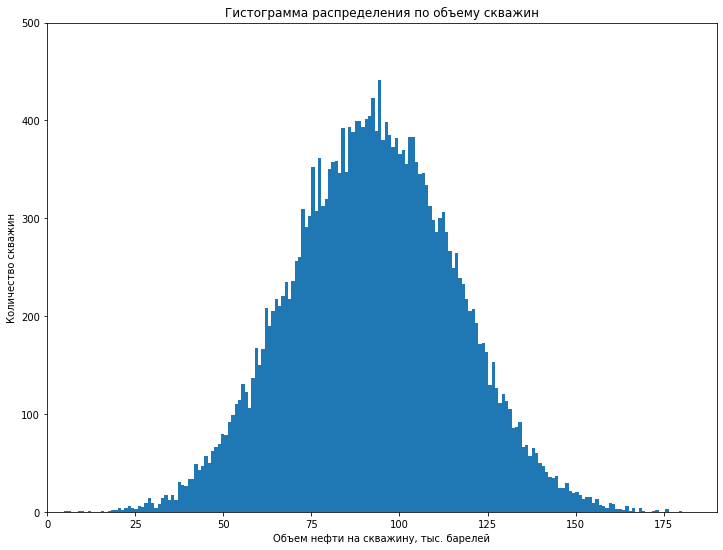

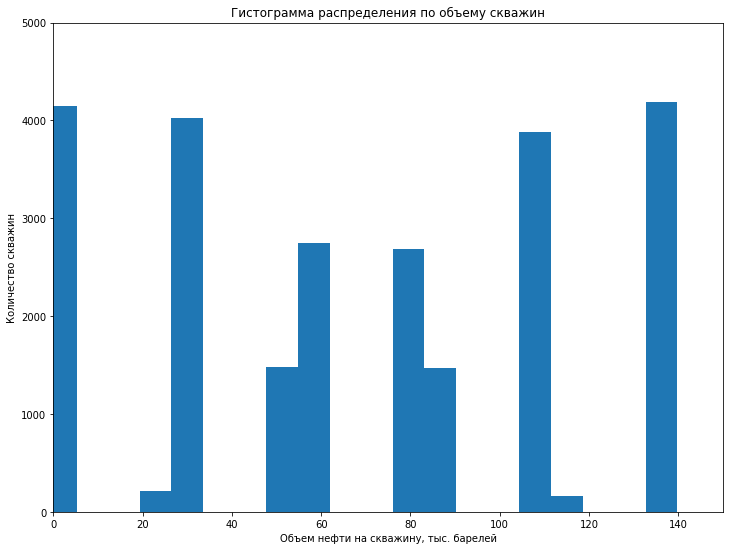

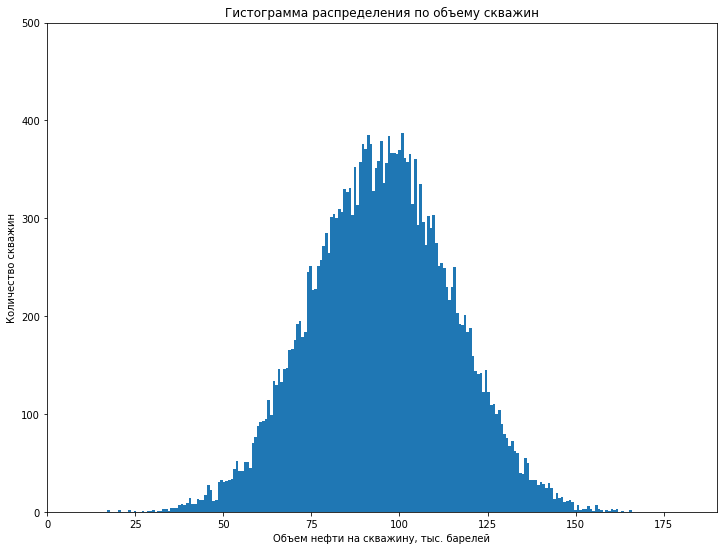

In [42]:
# проверим распределение предсказанных значений запасов по скважинам
# оцениваем гистограммы с точки зрения расчитанных выше необходимых объёмов нефти
hist(data_1_predicted['predicted_product'], 200, 190, 500)
hist(data_2_predicted['predicted_product'], 20, 150, 5000)
hist(data_3_predicted['predicted_product'], 200, 190, 500)

### Выводы:  
Анализ средних объемов на скважину для каждого региона следующий:
  * Средний запас фактичекой нефти на скважину в 1 92.5;
  * Средний запас фактичекой нефти на скважину в 2 68.825;
  * Средний запас фактичекой нефти на скважину в 3 95.

Изучены средние фактические запасы. Для первого и третьего - высокая вероятность окупить затраты. Разброс значений вокруг среднего 92.5 и 95 говорит нам о том, что существует достаточно много скважин, где запасы больше необходимого среднего.

Во втором наборе данных возможно и есть определенный смысл для наших расчётов - значений больше требуемых 111 достаточно много и при определенной доли везения можно выбрать только лучшие в этой выборке, хотя и среднее значение 68.825.

<div class="alert alert-block alert-success">
<b>Успех:</b> Значение для безубыточной разработки посчитано верно, с выводом согласен  
</div>

## Расчёт прибыли и рисков 

In [43]:
# функция для расчета прибыли на 500 разведанных точек.
def oil_profit_calculation(target, probabilities, count):
    # сортируем вероятности по убыванию
    probs_sorted = probabilities.sort_values(ascending=False)
    # выбираем из отсортированных точек кол-во, соответствующее заданию
    selected = target[probs_sorted.index][:count]
    return income_per_barrel * selected.sum() - budget

<div class="alert alert-block alert-success">
<b>Успех:</b> Ф-ция для подсчета прибыли определена верно
</div>


In [44]:
# функция для применения техники Bootstrap с 1000 выборок
state = np.random.RandomState(12345)
def bootstrap_1000(target, probs):
    values=[]
    lost = 0
    for i in range(1000):
        target_sample = target.sample(replace=True, random_state=state, n=chosen_points)
        probs_sample = probs[target_sample.index]
        profit = oil_profit_calculation(target, probs_sample, best_points)
        if profit < 0:
            lost +=1
        values.append(profit)
    
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    average = values.mean()
    risk = lost / 1000
    return average, lower, upper, risk

<div class="alert alert-block alert-success">
<b>Успех:</b> С бутстрапом тоже все в порядке, метрики считаются верным образом!  
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b>
    
Риски можно лаконично считать в 1 строку: `(values < 0).mean() * 100`
</div>                                                              


<div class="alert alert-block alert-warning">
<b>Комментарий студента: </b>Действительно, спасибо
</div>

In [46]:
average_1, lower_1, upper_1, risk_1 = bootstrap_1000(data_1_predicted['real_product'], 
                                                     data_1_predicted['predicted_product'])
print('Данные по первому региону.')
print('Средняя прибыль для региона = {:.2f} тыс.руб.'.format(average_1/1000))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_1, upper_1))
print('Процент риска {:.2%}'.format(risk_1))

Данные по первому региону.
Средняя прибыль для региона = 391783.68 тыс.руб.
95% доверительный интервал от -142969648.77 до 888569480.35 тыс.руб.
Процент риска 7.00%


In [49]:
average_2, lower_2, upper_2, risk_2 = bootstrap_1000(data_2_predicted['real_product'], 
                                                     data_2_predicted['predicted_product'])
print('Данные по второму региону.')
print('Средняя прибыль для региона = {:.2f} тыс.руб.'.format(average_2/1000))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_2, upper_2))
print('Процент риска {:.2%}'.format(risk_2))

Данные по второму региону.
Средняя прибыль для региона = 448275.29 тыс.руб.
95% доверительный интервал от 50275475.26 до 836625980.88 тыс.руб.
Процент риска 1.30%


In [50]:
average_3, lower_3, upper_3, risk_3 = bootstrap_1000(data_3_predicted['real_product'], 
                                                     data_3_predicted['predicted_product'])
print('Данные по второму региону.')
print('Средняя прибыль для региона = {:.2f} тыс.руб.'.format(average_3/1000))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_3, upper_3))
print('Процент риска {:.2%}'.format(risk_3))

Данные по второму региону.
Средняя прибыль для региона = 382527.15 тыс.руб.
95% доверительный интервал от -202065021.73 до 929888044.91 тыс.руб.
Процент риска 9.40%


### Выводы:  
Мы отсеиваем первый и третий регион, так как риски относительно велики (7.0% и 9.4%).  
Остается один единственный регион - второй. Его риск ниже требуемого (1.3%). Кроме того 95% доверительный интервал показывает, что даже при не слишком удачном выборе скважин разработка окупится.


<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, проведено детальное исследование и был выбран правильный регион!
</div>

# Общий вывод:   
1) Изучины данные. Проведена подготовка данных к моделированию, были проведены проверка на дубликаты и пропущенные значения.  
2) Составлена функция расчета прибыли в регионе. Посчитаны необходимые средние значения:
  * Необходимая средняя прибыль на лучшую точку - 50000.0 тыс.руб.;
  * Необходимый средний объем нефти на точку - 111.11111111111111 тыс. баррелей;
  * Необходимый средний объем нефти на регион - 22222.222222222223 тыс. баррелей.  

3) Посчитана прибыль и риски за каждый регион и обоснован выбор региона.   
4) Второй регион получился одним из лучших по показателям предсказывания, хотя распределение данных не похоже на нормальное, что подталкивает к сомениям в корректности результата:  
  * Средняя прибыль для региона = 448275.29 тыс.руб.  
  * 95% доверительный интервал от 50275475.26 до 836625980.88 тыс.руб.  
  * Процент риска 1.30%


<div class="alert alert-block alert-success">
<b>Успех:</b> Всегда приятно наблюдать подробный и структурированный итоговый вывод в конце работы! 
</div>




<div class="alert alert-block alert-info">
<b>Совет: </b> Если интересно изучить тему бутстрапа глубже - я оставлю  ниже несколько интересных и полезных ссылок по теме:
        
1. "Bootstrap Hypothesis Testing in Statistics with Example" 
        
https://www.youtube.com/watch?v=9STZ7MxkNVg
        
2. "How to Calculate Bootstrap Confidence Intervals For Machine Learning Results in Python" 
        
https://machinelearningmastery.com/calculate-bootstrap-confidence-intervals-machine-learning-results-python/
        
3. "A Gentle Introduction to the Bootstrap Method" 

https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/
        
4. "An Introduction to the Bootstrap Method" 
        
https://towardsdatascience.com/an-introduction-to-the-bootstrap-method-58bcb51b4d60#:~:text=The%20basic%20idea%20of%20bootstrap,population%20mean)%20on%20sample%20data.&amp;text=A%20sample%20from%20population%20with%20sample%20size%20n
        
5. "Bootstrapping and Resampling in Statistics with Example" 
        
        
https://www.youtube.com/watch?v=O_Fj4q8lgmc

6. Также одна из программ на рынке по этой теме управлненеческого моделирования - AnyLogic - интересный продукт. Можешь видео из интернета посмотреть по какому-нибудь примеру с её использованием. Тогда тема управленческого моделирования и бутстрапа может по-другому лечь.
</div>


<div class="alert alert-block alert-warning">
<b>Комментарий студента: </b>Спасибо, да, хочу чуть больше про это почитать.
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован